In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from run_bnn import run_bnn, bnn_experiment
from run_sbi import run_snpe, sbi_experiment
import numpy as np
import torch

# Run ABC-SMC (Reproducibility)
run the script run_abc.py to generate all the necessary data from the ABC-SMC sampler. Alternatively one can directly discover and tune the notebook: abc_smc.ipynb.

Will compute and store the following files 
* smcabc_post_10gen - posterior samples
* smcabc_trails_10gen.npy - number of simulated proposals

Obs ABC-SMC requre many proposals, therefore this takes some time

In [ ]:
#obs to stop the script, interupt the kernel several times... 
%run run_abc.py

## Run SNPE-C (Reproducibility)
run the SNPE-C (sbi package) script.

### Generating the following files
* data/sbi_data_post.npy - posterior samples
* data/sbi_data_time.npy - elapsed times

In [ ]:
sbi_experiment()

# Custom SNPE (Testing)
For testing the script with fewer runs and other parameters. Obs that these results might not work for all plots in plotting.ipynb

In [ ]:
ID = 'data'
sbi_post, sbi_time, sbi_post_object = run_snpe(total_runs=1, num_generation=6, seed=2, nde='maf')

In [ ]:
#Obs need "data" folder 
np.save(f'{ID}/sbi_{ID}_post', sbi_post)
np.save(f'{ID}/sbi_{ID}_time', sbi_time)

In [ ]:
#Take DirectPosterior to get the NN
test = sbi_post_object[0]

In [ ]:
#count the number of trainable weights/parameters
def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        total_params+=param
        print(name,':', param)
    print(f"Total Trainable Params: {total_params}")

In [ ]:
count_parameters(test.net)

# Run BNN (Reproducibility)


### The following files are produced
posterior samples from 4 bins per parameter, repeated 10 times, a 6 step iteration, with 0.05 threshold. With the time elapsed.
* data/bcnn_data_post.npy' - posterior samples
* data/bcnn_data_time.npy' - time elapsed 

posterior samples from 3 bins per parameter, repeated 10 times, a 6 step iteration, with 0.05 threshold.
* data/bcnn_data_bins3_post.npy - posterior samples

posterior samples from 5 bins, repeated 10 times, a 6 step iteration, with 0.05 threshold.
* data/bcnn_data_bins5_post.npy - posterior samples

posterior samples from 4 bins, repeated 10 times, a 6 step iteration, with no threshold.
* data/bcnn_data_no_thresh_post.npy - posterior samples

posterior samples from 4 bins, repeated 10 times, a 6 step iteration, with exponential decreasing threshold.
* data/bcnn_data_exp_thresh_post.npy - posterior samples

In [4]:
import tensorflow as tf

#in case CUDA is causing problems...
tf.config.set_visible_devices([], 'GPU')

In [ ]:
bnn_experiment()

# Custom BNN (Testing)
For testing the script with fewer runs and other parameters.
Obs that these results might not work for all plots in plotting.ipynb

In [32]:
ID = 'data'
bcnn_post, bcnn_proposals, bcnn_time = run_bnn(total_runs=1, num_rounds=6, seed=3, 
                               ID=ID)

starting run 0
starting round 0
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
conv1d_flipout (Conv1DFlipou (None, 100, 25)           275       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 25)            0         
_________________________________________________________________
conv1d_flipout_1 (Conv1DFlip (None, 10, 6)             1506      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 6)              0         
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense_flipout (DenseFl

7/7 [==============================] - 0s 4ms/step - loss: 3.6260
Epoch 82/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6594
Epoch 83/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5985
Epoch 84/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6301
Epoch 85/100
7/7 [==============================] - 0s 3ms/step - loss: 3.6290
Epoch 86/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5740
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5223
Epoch 88/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5989
Epoch 89/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5375
Epoch 90/100
7/7 [==============================] - 0s 6ms/step - loss: 3.5861 - val_loss: 3.5044
Epoch 91/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6888
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5726
Epoch 93/100
7/7 [============================

Epoch 67/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7442 - val_loss: 2.7247
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7257 - val_loss: 2.9071
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7563 - val_loss: 2.7870
Epoch 70/100
13/13 [==============================] - 0s 6ms/step - loss: 2.7101 - val_loss: 2.8265
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7583 - val_loss: 2.7259
Epoch 72/100
13/13 [==============================] - 0s 6ms/step - loss: 2.6908 - val_loss: 2.7321
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7308 - val_loss: 2.7186
Epoch 74/100
13/13 [==============================] - 0s 5ms/step - loss: 2.6967 - val_loss: 2.7463
Epoch 75/100
13/13 [==============================] - 0s 5ms/step - loss: 2.6695 - val_loss: 2.7458
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7217 - val_loss: 2.6846


Epoch 49/100
19/19 [==============================] - 0s 5ms/step - loss: 2.4272 - val_loss: 2.4453
Epoch 50/100
19/19 [==============================] - 0s 5ms/step - loss: 2.4080 - val_loss: 2.4790
Epoch 51/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3783 - val_loss: 2.3699
Epoch 52/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3666 - val_loss: 2.3000
Epoch 53/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3233 - val_loss: 2.4376
Epoch 54/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3663 - val_loss: 2.3054
Epoch 55/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3589 - val_loss: 2.3287
Epoch 56/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3149 - val_loss: 2.2970
Epoch 57/100
19/19 [==============================] - 0s 5ms/step - loss: 2.3380 - val_loss: 2.2875
Epoch 58/100
19/19 [==============================] - 0s 5ms/step - loss: 2.2938 - val_loss: 2.3516


Epoch 31/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6351 - val_loss: 1.7530
Epoch 32/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6652 - val_loss: 1.7874
Epoch 33/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6381 - val_loss: 1.7985
Epoch 34/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6256 - val_loss: 1.7996
Epoch 35/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6219 - val_loss: 1.7427
Epoch 36/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6038 - val_loss: 1.7332
Epoch 37/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5881 - val_loss: 1.7476
Epoch 38/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5877 - val_loss: 1.7586
Epoch 39/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5939 - val_loss: 1.6552
Epoch 40/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5769 - val_loss: 1.7614


Epoch 13/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1411 - val_loss: 1.1601
Epoch 14/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1417 - val_loss: 1.1571
Epoch 15/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1398 - val_loss: 1.1178
Epoch 16/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1421 - val_loss: 1.1783
Epoch 17/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1318 - val_loss: 1.1290
Epoch 18/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1439 - val_loss: 1.1455
Epoch 19/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1384 - val_loss: 1.1252
Epoch 20/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1157 - val_loss: 1.1338
Epoch 21/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1342 - val_loss: 1.1620
Epoch 22/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1071 - val_loss: 1.1183


Epoch 95/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9634 - val_loss: 0.9703
Epoch 96/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9302 - val_loss: 0.9071
Epoch 97/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9212 - val_loss: 0.9246
Epoch 98/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9240 - val_loss: 0.9138
Epoch 99/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9319 - val_loss: 0.9197
Epoch 100/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9120 - val_loss: 0.9289
starting round 5
Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8729 - val_loss: 0.8545
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8536 - val_loss: 0.8372
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8395 - val_loss: 0.9062
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.8570 - val

Epoch 77/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7208 - val_loss: 0.7742
Epoch 78/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7424 - val_loss: 0.8322
Epoch 79/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7342 - val_loss: 0.8700
Epoch 80/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7137 - val_loss: 0.7810
Epoch 81/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7116 - val_loss: 0.7781
Epoch 82/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7203 - val_loss: 0.8105
Epoch 83/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7153 - val_loss: 0.7510
Epoch 84/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7073 - val_loss: 0.8118
Epoch 85/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7142 - val_loss: 0.7599
Epoch 86/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7130 - val_loss: 0.7269


without correction

In [33]:
ID = 'data'
bcnn_post_nocorr, bcnn_proposals_nocorr, bcnn_time_nocorr = run_bnn(total_runs=1, num_rounds=6, seed=3, 
                               ID=ID, correction=False)

starting run 0
starting round 0
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 1)]          0         
_________________________________________________________________
conv1d_flipout (Conv1DFlipou (None, 100, 25)           275       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 25)            0         
_________________________________________________________________
conv1d_flipout_1 (Conv1DFlip (None, 10, 6)             1506      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 6)              0         
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense_flipout (DenseFl

7/7 [==============================] - 0s 3ms/step - loss: 3.6666
Epoch 82/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5902
Epoch 83/100
7/7 [==============================] - 0s 3ms/step - loss: 3.6359
Epoch 84/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5867
Epoch 85/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6118
Epoch 86/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5791
Epoch 87/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6482
Epoch 88/100
7/7 [==============================] - 0s 4ms/step - loss: 3.6270
Epoch 89/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5915
Epoch 90/100
7/7 [==============================] - 0s 6ms/step - loss: 3.6454 - val_loss: 3.4927
Epoch 91/100
7/7 [==============================] - 0s 3ms/step - loss: 3.6054
Epoch 92/100
7/7 [==============================] - 0s 3ms/step - loss: 3.5723
Epoch 93/100
7/7 [============================

Epoch 67/100
13/13 [==============================] - 0s 6ms/step - loss: 2.8685 - val_loss: 2.7926
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8231 - val_loss: 2.8078
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8808 - val_loss: 2.7991
Epoch 70/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7984 - val_loss: 2.7508
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8656 - val_loss: 2.7968
Epoch 72/100
13/13 [==============================] - 0s 5ms/step - loss: 2.8104 - val_loss: 2.8081
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7467 - val_loss: 2.8227
Epoch 74/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7793 - val_loss: 2.7943
Epoch 75/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7615 - val_loss: 2.7431
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 2.7531 - val_loss: 2.8026


Epoch 49/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8211 - val_loss: 1.7209
Epoch 50/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8431 - val_loss: 1.8674
Epoch 51/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8295 - val_loss: 1.7664
Epoch 52/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8104 - val_loss: 1.7846
Epoch 53/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8162 - val_loss: 1.8212
Epoch 54/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8477 - val_loss: 1.7362
Epoch 55/100
19/19 [==============================] - 0s 5ms/step - loss: 1.8101 - val_loss: 1.7323
Epoch 56/100
19/19 [==============================] - 0s 5ms/step - loss: 1.7931 - val_loss: 1.7564
Epoch 57/100
19/19 [==============================] - 0s 5ms/step - loss: 1.7798 - val_loss: 1.7704
Epoch 58/100
19/19 [==============================] - 0s 5ms/step - loss: 1.7561 - val_loss: 1.7619


Epoch 31/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0858 - val_loss: 1.0697
Epoch 32/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0673 - val_loss: 1.0643
Epoch 33/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0771 - val_loss: 1.0504
Epoch 34/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0380 - val_loss: 1.0580
Epoch 35/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0370 - val_loss: 1.0496
Epoch 36/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0326 - val_loss: 1.0376
Epoch 37/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0422 - val_loss: 1.0577
Epoch 38/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0420 - val_loss: 1.0350
Epoch 39/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0181 - val_loss: 1.0315
Epoch 40/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0463 - val_loss: 1.0688


Epoch 13/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5780 - val_loss: 0.6242
Epoch 14/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5660 - val_loss: 0.5773
Epoch 15/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6133 - val_loss: 0.6731
Epoch 16/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5759 - val_loss: 0.6039
Epoch 17/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5331 - val_loss: 0.5968
Epoch 18/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5176 - val_loss: 0.6103
Epoch 19/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5454 - val_loss: 0.6354
Epoch 20/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5262 - val_loss: 0.5757
Epoch 21/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5505 - val_loss: 0.6027
Epoch 22/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5387 - val_loss: 0.6308


Epoch 95/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3371 - val_loss: 0.4256
Epoch 96/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3200 - val_loss: 0.4008
Epoch 97/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3456 - val_loss: 0.3966
Epoch 98/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3171 - val_loss: 0.4050
Epoch 99/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3274 - val_loss: 0.4559
Epoch 100/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3414 - val_loss: 0.3956
starting round 5
Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2708 - val_loss: 0.2672
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2585 - val_loss: 0.2508
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2632 - val_loss: 0.2698
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2533 - val

Epoch 77/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1761 - val_loss: 0.1457
Epoch 78/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1488 - val_loss: 0.1586
Epoch 79/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1261 - val_loss: 0.1788
Epoch 80/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1423 - val_loss: 0.1722
Epoch 81/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1697 - val_loss: 0.2645
Epoch 82/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1603 - val_loss: 0.1779
Epoch 83/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1476 - val_loss: 0.2065
Epoch 84/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1318 - val_loss: 0.1870
Epoch 85/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1313 - val_loss: 0.1994
Epoch 86/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1642 - val_loss: 0.1559


In [28]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
from tensorflow_probability import distributions as tfd
import scipy

#get true posterior from mcmc run
subset_exact_samples = np.load('exact_mcmc_post.npy')

In [ ]:
def plot_conv(proposals):
    for theta_small in proposals:
        f = plt.figure(figsize=(15, 10), constrained_layout=True)
        gs = f.add_gridspec(3, 5)
        #BCNN KDE

        def multivar(grid, m, var, xlabel='', ylabel=''):
            ax = f.add_subplot(grid)
            x, y = np.mgrid[-2:2:.01, -1:1:.01]
            pos = np.dstack((x, y))

            rv = tfd.MultivariateNormalFullCovariance(loc=m, 
                                                 covariance_matrix=var)

            ax.contourf(x, y, rv.prob(pos))
            ax.set_xlim(-2,2)
            ax.set_ylim(-1,1)
            ax.set_yticks([])
            ax.set_xticks([])
            return ax

        #BCNN
        mcmc_mean = subset_exact_samples.mean(axis=0)
        c=0
        c1 = 0
        for i, res in enumerate(theta_small):
            m = res[0]
            var = res[1]
            if i < 4:
                ax = multivar(gs[0,i+1],m, var, xlabel=f'round {i+1}')
                ax.scatter(mcmc_mean[0], mcmc_mean[1], color='C3')
            elif i < 9:
                ax = multivar(gs[1,c],m, var, xlabel=f'round {i+1}')
                ax.scatter(mcmc_mean[0], mcmc_mean[1], color='C3')
                c+=1

            elif i < 15:
                ax = multivar(gs[2,c1],m, var, xlabel=f'round {i+1}')
                ax.scatter(mcmc_mean[0], mcmc_mean[1], color='C3')
                c1+=1

        #MCMC Gaussian approx
            cov = np.cov(subset_exact_samples, rowvar=0)
            mean = subset_exact_samples.mean(axis=0)

            x, y = np.mgrid[-2:2:.01, -1:1:.01]
            pos = np.dstack((x, y))

            rv = scipy.stats.multivariate_normal(mean, cov)


            ax = f.add_subplot(gs[0, 0])
            ax.contourf(x, y, rv.pdf(pos))
            #ax2.scatter(target_theta[:,0],target_theta[:,1], color="red", label="true")
            ax.set_xlim(-2,2)
            ax.set_ylim(-1,1)
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_xlabel('Gaussian fit')
            ax.set_ylabel('MCMC (true)')
        pdf.savefig(f)
    pdf.close()

<ipython-input-30-4e0afb061473>:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f.add_subplot(gs[0, 0])


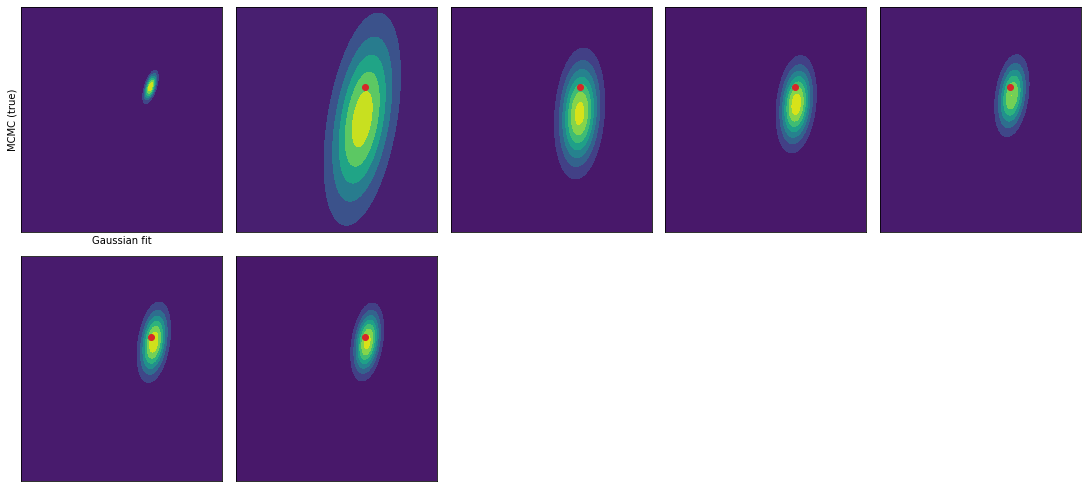

In [31]:
pdf = matplotlib.backends.backend_pdf.PdfPages("regression_withcorrection.pdf")
plot_conv(bcnn_proposals)

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("regression_nocorrection.pdf")
plot_conv(bcbcnn_proposals_nocorrcorr)

In [ ]:
#Obs need "data" folder 
np.save(f'{ID}/bcnn_{ID}_post', bcnn_post)
np.save(f'{ID}/bcnn_{ID}_time', bcnn_time)